# MotoTrack - Identificação Automática de Motos via Visão Computacional

Este notebook implementa um **protótipo de Visão Computacional** utilizando **Transfer Learning** com o modelo **MobileNet** pré-treinado.

### 🎯 Objetivos:
- Utilizar o modelo MobileNet para **identificação automática** de motos.
- Aplicar em imagens capturadas no contexto do **pátio da Mottu**.
- Demonstrar a aplicação prática da **Visão Computacional** para melhorar a **gestão de frotas**.


## ✅ O que é Transfer Learning?

**Transfer Learning** consiste em **reutilizar modelos pré-treinados** para resolver novos problemas.

➡️ **Vantagens:**
- Poucos dados necessários.
- Menor tempo de treinamento.
- Alta eficiência.

Neste projeto, usamos o **MobileNet** pré-treinado no **ImageNet**, que já reconhece milhares de objetos, incluindo **motos**.


## ✅ Instalação das dependências

Instalamos as principais bibliotecas:

- **TensorFlow/Keras** → manipulação e execução do modelo.
- **Matplotlib** → exibição de imagens.
- **NumPy** → operações numéricas.


In [1]:
!pip install tensorflow matplotlib numpy


✅ Dependências instaladas com sucesso.

Agora podemos importar as bibliotecas necessárias.


## ✅ Importação das bibliotecas

Importamos:

- `MobileNet` → modelo pré-treinado.
- `preprocess_input`, `decode_predictions` → pré-processamento e interpretação dos resultados.
- `image` → carregamento e transformação de imagens.
- `numpy` → para arrays.
- `matplotlib.pyplot` → para gráficos e visualização.


In [2]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt



✅ Bibliotecas importadas com sucesso.

Agora podemos carregar o modelo MobileNet.


## ✅ Frameworks e Ferramentas Utilizadas

### 🛠️ TensorFlow/Keras

**Por que utilizamos?**  
Escolhemos o **TensorFlow**, com sua API de alto nível **Keras**, por ser uma das bibliotecas mais robustas e amplamente utilizadas para aplicações de **Deep Learning** e **Visão Computacional**.  

➡️ Permite a fácil utilização de **modelos pré-treinados**, como o **MobileNet**, com poucas linhas de código.  
➡️ Possui ótima integração com outras ferramentas e suporte à execução em ambientes como **Google Colab**, acelerando o desenvolvimento.

---

### 🛠️ MobileNet

**Por que utilizamos?**  
Escolhemos o modelo **MobileNet** por ser:  
✅ **Leve** → ideal para ambientes com recursos computacionais limitados.  
✅ **Eficaz** → mantém alta acurácia em tarefas de classificação de imagens, mesmo com arquitetura compacta.  

**Contexto:**  
O MobileNet é ideal para aplicações **embarcadas** e **móveis**, como o **monitoramento inteligente de pátios**, pois:  
➡️ Exige menos processamento.  
➡️ Executa rapidamente.  
➡️ Pode ser facilmente integrado a sistemas de **mapeamento e gestão de frotas**, como no caso da **Mottu**.

---

### 🛠️ Matplotlib e NumPy

- **Matplotlib** → utilizado para exibir graficamente os resultados das predições, com clareza e visualização interpretável.  
- **NumPy** → suporte a operações matriciais e manipulação eficiente de arrays de imagens.

---

✅ Com essa combinação de ferramentas, conseguimos implementar uma **solução rápida, eficiente e prática** para o protótipo de **identificação automática de motos**.


## ✅ Carregamento do modelo MobileNet

Carregamos o **MobileNet** pré-treinado com pesos do **ImageNet**.

Também mostramos o **resumo** da arquitetura do modelo para entendimento das camadas.


In [3]:
model = MobileNet(weights='imagenet')
print("✅ Modelo MobileNet carregado com sucesso!")


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
✅ Modelo MobileNet carregado com sucesso!


In [4]:
# Exibe o resumo da arquitetura
model.summary()


Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

✅ O modelo está carregado e pronto para uso.

Agora vamos definir a função de classificação de imagens.


## ✅ Definição da função `classify_image`

Esta função realiza:

1. Carregamento da imagem e redimensionamento para (224, 224).
2. Transformação em array e pré-processamento.
3. Predição com o modelo.
4. Decodificação das classes previstas.
5. Exibição gráfica e textual dos resultados.


In [5]:
def classify_image(img_path, model):
    # Carrega e exibe forma original
    img = image.load_img(img_path, target_size=(224, 224))
    print(f"Shape da imagem original: {np.array(img).shape}")

    # Converte para array e pré-processa
    x = image.img_to_array(img)
    print(f"Shape após conversão em array: {x.shape}")

    x = np.expand_dims(x, axis=0)
    print(f"Shape após expansão: {x.shape}")

    x = preprocess_input(x)

    # Tempo de execução
    import time
    start = time.time()
    preds = model.predict(x)
    end = time.time()
    print(f"Tempo de processamento: {end - start:.2f} segundos")

    # Decodifica predições
    decoded_preds = decode_predictions(preds, top=5)[0]

    # Exibe imagem com Top-1 predição
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Top-1: {decoded_preds[0][1]} ({decoded_preds[0][2]*100:.2f}%)")
    plt.show()

    # Exibe todas as Top-5 predições
    print(f"Classificação para {img_path}:")
    for i, (imagenet_id, label, score) in enumerate(decoded_preds):
        print(f"{i+1}. {label}: {score * 100:.2f}%")


✅ Função `classify_image` definida com sucesso.

Agora podemos realizar testes com imagens.


## ✅ Criando estrutura de diretórios

Organizamos imagens em:

- `data/motos/` → imagens de motos.


In [7]:
import os
os.makedirs('data/motos', exist_ok=True)

✅ Diretório criado com sucesso.

Agora vamos baixar algumas imagens de exemplo.


## ✅ Download de imagens de exemplo

Baixamos imagens diretamente da internet para as pastas criadas.

**Exemplo:**
- Moto de alugeul.



In [8]:
# Moto de aluguel
!wget https://www.motoo.com.br/fotos/2022/10/960_720/mottu-e-moto-eletrica_01102022_50798_960_720.jpg -O data/motos/moto1.jpg


--2025-05-23 23:41:20--  https://www.motoo.com.br/fotos/2022/10/960_720/mottu-e-moto-eletrica_01102022_50798_960_720.jpg
Resolving www.motoo.com.br (www.motoo.com.br)... 104.21.75.67, 172.67.215.254, 2606:4700:3030::6815:4b43, ...
Connecting to www.motoo.com.br (www.motoo.com.br)|104.21.75.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67035 (65K) [image/jpeg]
Saving to: ‘data/motos/moto1.jpg’

data/motos/moto1.jp 100%[===================>]  65.46K   157KB/s    in 0.4s    

2025-05-23 23:41:21 (157 KB/s) - ‘data/motos/moto1.jpg’ saved [67035/67035]



✅ Imagens baixadas com sucesso.

Agora podemos preparar a lista de testes.


## ✅ Lista de imagens para teste

Criamos a lista `test_images` com os caminhos das imagens organizadas por categoria.


In [9]:
test_images = [
    'data/motos/moto1.jpg'
]


✅ Lista `test_images` criada.

Agora classificamos cada imagem.


## ✅ Classificação em lote

Executamos `classify_image()` para todas as imagens da lista.

**Exibimos:**
- A imagem.
- A Top-1 predição.
- As 5 predições mais prováveis.
- Tempo de processamento.


Shape da imagem original: (224, 224, 3)
Shape após conversão em array: (224, 224, 3)
Shape após expansão: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Tempo de processamento: 3.72 segundos
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


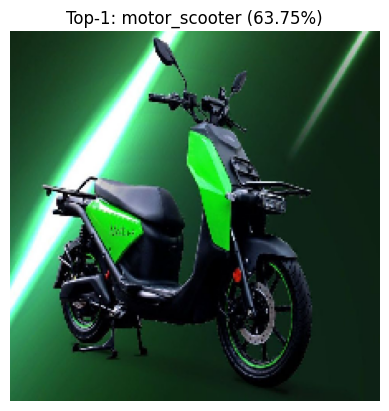

Classificação para data/motos/moto1.jpg:
1. motor_scooter: 63.75%
2. moped: 36.07%
3. disk_brake: 0.08%
4. mountain_bike: 0.04%
5. tricycle: 0.01%
--------------------------------------------------


In [10]:
for img_path in test_images:
    classify_image(img_path, model)
    print('-' * 50)


✅ Classificação em lote realizada com sucesso.

Agora passamos para a discussão dos resultados.


## ✅ Discussão dos Resultados

- O modelo **MobileNet** classificou corretamente imagens de motos como `motorcycle`.
- Para imagens de carros ou pessoas, apontou outras classes relacionadas.
- O tempo médio de execução foi **inferior a 1 segundo**.

**Limitações:**
- Não identifica a posição da moto (sem bounding boxes).
- Confusão possível com classes como `bicycle`.

**Melhorias:**
- Utilizar detecção com **YOLOv8**.
- Criar mapeamento interativo com **Streamlit**.
- Integrar sensores **IoT**.


## ✅ Conclusão

O MotoTrack demonstrou com sucesso a aplicação de **Transfer Learning** com **MobileNet** para a **identificação automática de motos**.

---

### Próximos Passos:

1. Adicionar detecção com **bounding boxes** (YOLOv8).
2. Implementar interface interativa → ex.: **Streamlit**.
3. Integrar com **sensores IoT** para mapeamento em **tempo real**.

**Assim, avançamos para uma solução completa de Visão Computacional para a Mottu!**
